# Telemarketing example

## Data import

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Dry_Bean.csv')


In [3]:
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [4]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


## Split categorical/continuos variables

In [6]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [7]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER


In [8]:
df_numerical=df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [9]:
df_numerical.columns


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

## Categorical data

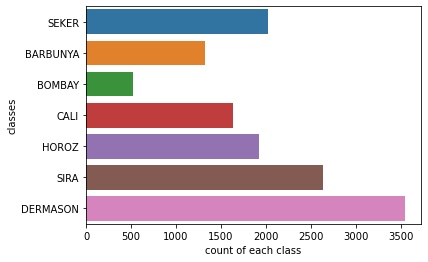

In [12]:
#Visualize Class Counts
sns.countplot(y=df.Class ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [13]:
df_categorical.shape

(13611, 1)

In [16]:
dummies = pd.get_dummies(df_categorical[["Class"]],drop_first=True) 

dummies.tail()

,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
13606,0,0,1,0,0,0
13607,0,0,1,0,0,0
13608,0,0,1,0,0,0
13609,0,0,1,0,0,0
13610,0,0,1,0,0,0


## Numerical data

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

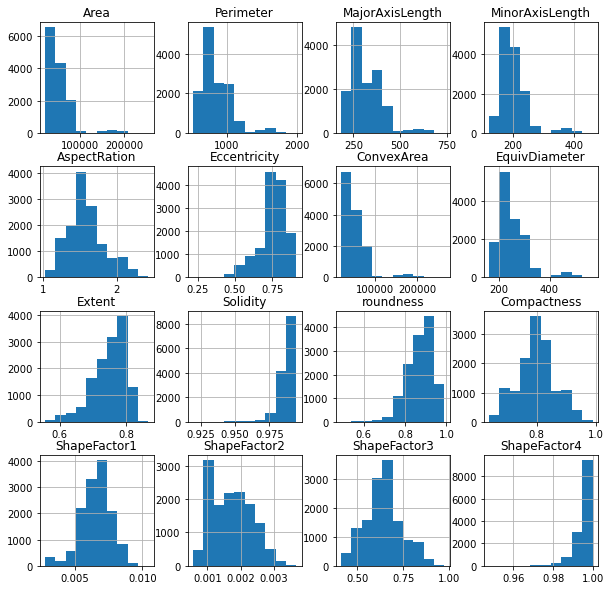

In [17]:
df_numerical.hist(figsize=(10,10))

In [44]:
import math
pd.options.mode.chained_assignment = None

df_numerical['logarea']=df_numerical['Area'].apply(math.log)
df_numerical['logconvexarea']=df_numerical['ConvexArea'].apply(math.log)
#df_numerical['expsol']=df_numerical['Solidity'].apply(lambda x: math.log(x+1))

<AxesSubplot:>

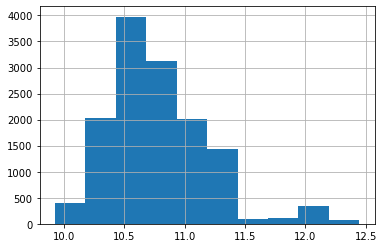

In [45]:
df_numerical['logarea'].hist()

<AxesSubplot:>

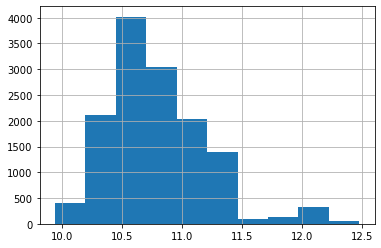

In [46]:
df_numerical['logconvexarea'].hist()

In [47]:
df_numerical.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,logcarea,logconvexarea,logarea,expsol
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,10.253968,10.265175,10.253968,0.966939
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,10.265836,10.280965,10.265836,0.955630
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,10.288069,10.298566,10.288069,0.969002


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>],
       [<AxesSubplot:title={'center':'logcarea'}>,
        <AxesSubplot:title={'center':'logconvexarea'}>,
        <AxesSubplot:title={'

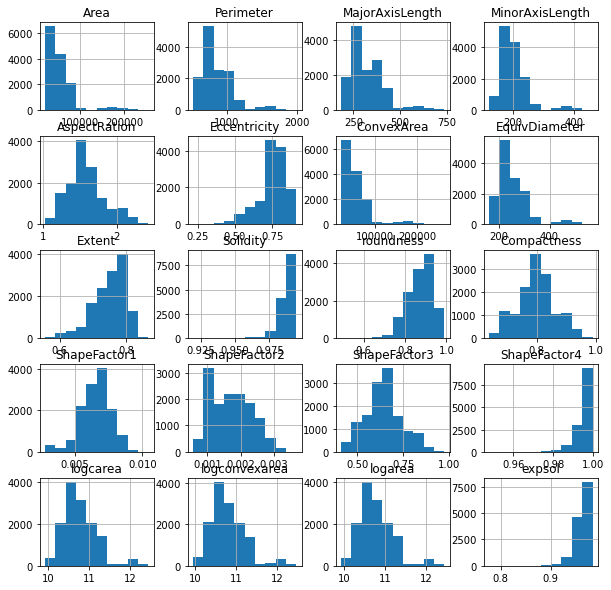

In [48]:
df_numerical.hist(figsize=(10,10))

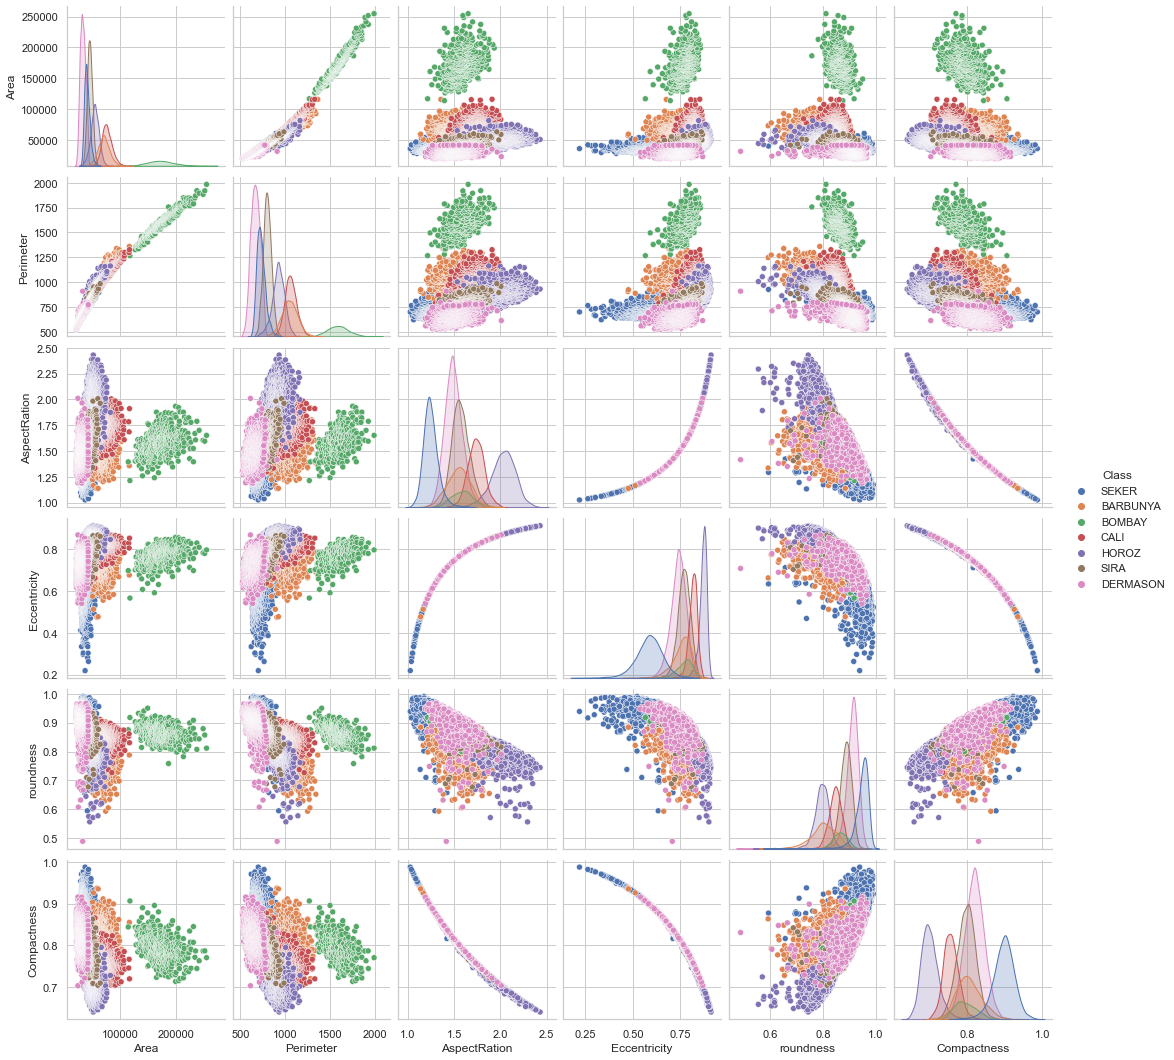

In [52]:
#Visualisation for 6 variable Scatterplot including Class labels
data6 = df[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
data6.head()
sns.set_theme(style="whitegrid")
sns.pairplot(data6, hue="Class")

## Standarize

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,logcarea,logconvexarea,logarea,expsol
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,-1.281165,-1.281568,-1.281165,0.367902
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138,-1.252271,-1.243241,-1.252271,-0.472183
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,-1.198142,-1.200518,-1.198142,0.521150
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,-1.146650,-1.117421,-1.146650,-2.249437
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,-1.135964,-1.141797,-1.135964,0.812746


<AxesSubplot:>

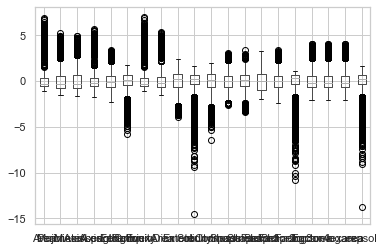

In [54]:
scaled_df.boxplot()

In [56]:
scaled_df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,logcarea,logconvexarea,logarea,expsol
13606,-0.373471,-0.446083,-0.366669,-0.363055,-0.123703,0.153343,-0.378191,-0.364148,-0.716284,0.684173,0.727872,0.032433,0.261424,0.055629,-0.006086,0.760813,-0.322500,-0.329390,-0.322500,0.689844
13607,-0.373334,-0.456336,-0.450053,-0.257015,-0.432979,-0.165141,-0.378662,-0.363962,1.022933,0.774384,0.818807,0.362794,0.110383,0.285117,0.328393,0.722659,-0.322269,-0.330189,-0.322269,0.781765
13608,-0.372038,-0.447833,-0.450478,-0.246456,-0.448618,-0.182940,-0.376143,-0.362197,-0.403392,0.591370,0.758468,0.370533,0.104270,0.289205,0.336328,0.390251,-0.320072,-0.325909,-0.320072,0.595364
13609,-0.371765,-0.427029,-0.428974,-0.266742,-0.380735,-0.106960,-0.372851,-0.361825,-0.903414,0.143717,0.581753,0.285098,0.141907,0.228375,0.248973,0.036440,-0.319610,-0.320327,-0.319610,0.140778
13610,-0.371356,-0.387557,-0.291736,-0.446224,0.148374,0.389116,-0.375101,-0.361268,0.799227,0.537539,0.253681,-0.240904,0.387512,-0.127775,-0.276481,0.713719,-0.318917,-0.324142,-0.318917,0.540597


In [58]:
X_numerical=scaled_df[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness"]]

In [59]:
dummies.tail(3)

,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
13608,0,0,1,0,0,0
13609,0,0,1,0,0,0
13610,0,0,1,0,0,0


In [60]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(13611, 6)
(13611, 6)


,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
13606,0,0,1,0,0,0
13607,0,0,1,0,0,0
13608,0,0,1,0,0,0
13609,0,0,1,0,0,0
13610,0,0,1,0,0,0


In [61]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA,Area,Perimeter,AspectRation,Eccentricity,roundness,Compactness
13606,0,0,1,0,0,0,-0.373471,-0.446083,-0.123703,0.153343,0.727872,0.032433
13607,0,0,1,0,0,0,-0.373334,-0.456336,-0.432979,-0.165141,0.818807,0.362794
13608,0,0,1,0,0,0,-0.372038,-0.447833,-0.448618,-0.182940,0.758468,0.370533
13609,0,0,1,0,0,0,-0.371765,-0.427029,-0.380735,-0.106960,0.581753,0.285098
13610,0,0,1,0,0,0,-0.371356,-0.387557,0.148374,0.389116,0.253681,-0.240904


### Separate Train/Test sets


In [63]:
y=df['Class']

In [64]:
y.shape

(13611,)

In [65]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(9527, 12) (4084, 12)


## Models

In [66]:
import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [67]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,1000,100)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



In [68]:
hyperp_search(classifier,parameters)

f1_train: nan using {'n_neighbors': 10}


/Users/andreamor/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/Users/andreamor/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

/Users/andreamor/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/andreamor/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


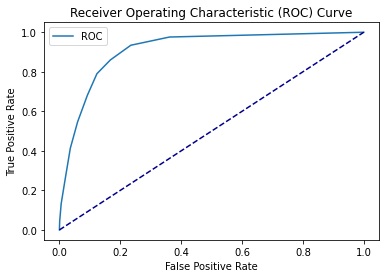

AUC: 0.91


In [39]:
model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [40]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)


f1_train: 0.735926 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
f1_test:  0.7184466019417476
[[3246  220]
 [ 331  703]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3466
           1       0.76      0.68      0.72      1034

    accuracy                           0.88      4500
   macro avg       0.83      0.81      0.82      4500
weighted avg       0.87      0.88      0.88      4500



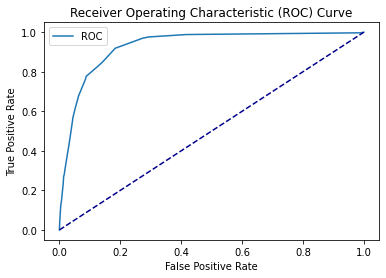

AUC: 0.93


In [41]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [42]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)


|--- nr.employed <= -0.89
|   |--- logduration <= -0.25
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- nr.employed <= -2.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- nr.employed >  -2.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- poutcome_success >  0.50
|   |   |   |--- logcampaign <= 0.40
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logcampaign >  0.40
|   |   |   |   |--- class: 0
|   |--- logduration >  -0.25
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- logduration <= 0.22
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- logduration >  0.22
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- poutcome_success >  0.50
|   |   |   |--- euribor3m <= -1.40
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- euribor3m >  -1.40
|   |   |   |   |--- truncated branch of depth 2
|--- nr.employed >  -0.89
|   |--- logduration <= 0.94
|   |   |--- cons.conf.idx <= -1.28
| 

In [43]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5910596026490066
f1_test:  0.5910596026490066
[[2798  668]
 [ 320  714]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      3466
           1       0.52      0.69      0.59      1034

    accuracy                           0.78      4500
   macro avg       0.71      0.75      0.72      4500
weighted avg       0.81      0.78      0.79      4500



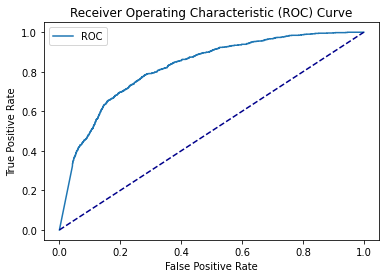

AUC: 0.82


In [44]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [45]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000] }


hyperp_search(classifier,parameters)


f1_train: 0.713804 using {'C': 1, 'max_iter': 1000}
f1_test:  0.6913961875321999
[[3230  236]
 [ 363  671]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3466
           1       0.74      0.65      0.69      1034

    accuracy                           0.87      4500
   macro avg       0.82      0.79      0.80      4500
weighted avg       0.86      0.87      0.86      4500



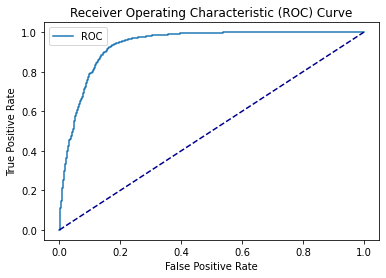

AUC: 0.94


In [46]:
model = LogisticRegression(C=1, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


In [47]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 0.722462 using {'C': 100, 'kernel': 'linear'}
f1_test:  0.7052896725440805
[[3215  251]
 [ 334  700]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3466
           1       0.74      0.68      0.71      1034

    accuracy                           0.87      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.87      0.87      0.87      4500



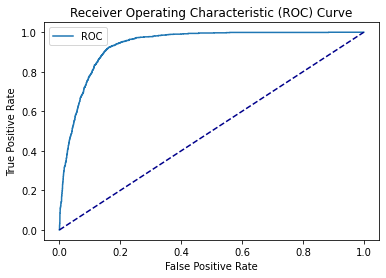

AUC: 0.94


In [48]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [52]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.734203 using {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1_test:  0.7285921625544267
[[3186  280]
 [ 281  753]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3466
           1       0.73      0.73      0.73      1034

    accuracy                           0.88      4500
   macro avg       0.82      0.82      0.82      4500
weighted avg       0.88      0.88      0.88      4500



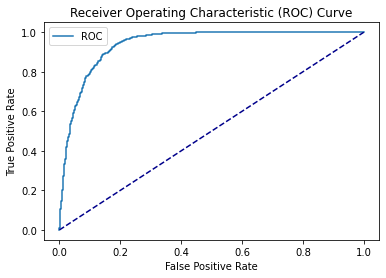

AUC: 0.94


In [53]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)


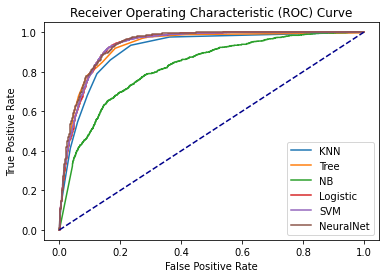

In [54]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Making predictions

In [59]:
df2 = pd.read_csv('telemarketing_pred_withtarget.csv')

In [60]:
#pd.options.mode.chained_assignment = None  # default='warn'

df2_categorical=df2.select_dtypes(include=['object'])

# Categorical
dummies2 = pd.get_dummies(df2_categorical[['marital', 'education', 'default','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 

# Numerical
df2_numerical=df2.select_dtypes(include=['int','float'])
df2_numerical['logcampaign']=df2_numerical['campaign'].apply(math.log)
df2_numerical['logduration']=df2_numerical['duration'].apply(math.log)
df2_numerical['logprevious']=df2_numerical['previous'].apply(lambda x: math.log(x+1))

# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!
scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

# Feature selection
X2_numerical=scaled_df2[['age','logduration','logprevious','logcampaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
X2=pd.concat([dummies2,X2_numerical], axis = 1)


In [61]:
X.columns

Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_nonexistent', 'poutcome_success', 'age',
       'logduration', 'logprevious', 'logcampaign', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [62]:
y2_pred = model_tree.predict(X2)

/Users/andreamor/.local/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- default_yes

  warnings.warn(message, FutureWarning)


ValueError: X has 36 features, but DecisionTreeClassifier is expecting 37 features as input.

In [101]:
X2.columns

Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'logduration',
       'logprevious', 'logcampaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [102]:
X.columns

Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'logduration',
       'logprevious', 'logcampaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [103]:
list(set(X) - set(X2))

[]

In [104]:
X2['default_yes']=0

In [105]:
#y2_pred = model_MLP.predict(X2)

model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree.fit(X, y)

y2_pred = model_tree.predict(X2)

y2=df2.target
print("f1_test: ", f1_score(y2, y2_pred))
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

/Users/andreamor/.local/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- default_yes
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 36 features, but DecisionTreeClassifier is expecting 35 features as input.

In [106]:
X2

,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,...,age,logduration,logprevious,logcampaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_yes
0,0,1,0,0,1,0,0,0,0,0,...,-1.184590,0.153972,1.773840,1.117911,-1.036841,-1.096339,-1.188431,-1.187102,-0.739913,0
1,1,0,0,0,0,0,0,0,1,0,...,-0.459227,0.115476,-0.417764,-0.921744,-1.036841,-0.791833,-1.373844,-1.110364,-0.739913,0
2,1,0,0,0,1,0,0,0,0,0,...,-0.096546,0.519844,-0.417764,0.694644,0.728330,0.745760,0.830517,0.794858,0.429467,0
3,1,0,0,0,1,0,0,0,0,0,...,-0.549897,-1.171076,-0.417764,0.694644,0.910934,-0.174453,0.892321,0.855035,0.901546,0
4,1,0,0,0,0,0,0,1,0,0,...,0.991498,0.270428,-0.417764,-0.921744,-1.036841,-1.096339,-1.188431,-1.168884,-0.739913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,0,1,0,0,0,0,...,-1.003249,-0.762644,-0.417764,0.098083,-0.002086,-0.582693,-0.323168,0.364237,0.490545,0
4996,1,0,0,0,0,0,0,1,0,0,...,0.719487,-1.171076,-0.417764,1.714472,0.910934,1.533797,-0.281965,0.799275,0.901546,0
4997,1,0,0,0,0,0,0,1,0,0,...,-0.005875,-0.466426,-0.417764,-0.921744,-0.002086,-0.582693,-0.323168,0.406747,0.490545,0
4998,0,1,0,0,0,0,0,0,1,0,...,-1.184590,-1.957250,-0.417764,1.446222,-1.036841,-1.096339,-1.188431,-1.199248,-0.739913,0


## Let fix the variables

In [107]:
X2.columns

Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'logduration',
       'logprevious', 'logcampaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'default_yes'],
      dtype='object')

In [108]:
dummies = pd.get_dummies(df_categorical[['marital', 'education','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 
dummies2 = pd.get_dummies(df2_categorical[['marital', 'education','housing', 'loan', 'contact',
       'month', 'poutcome']],drop_first=True) 


X=pd.concat([dummies,X_numerical], axis=1)
X2=pd.concat([dummies2,X2_numerical], axis=1)


In [109]:
print(X.columns)
print(X2.columns)


Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'age', 'logduration',
       'logprevious', 'logcampaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_y

In [110]:
# Retrain the model (with the entire dataset)

model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree.fit(X, y)

y_tree = model_tree.predict(X2)

y2=df2.target
print("f1_test: ", f1_score(y2,y_tree))
print(confusion_matrix(y2,y_tree))
print(classification_report(y2,y_tree))

f1_test:  0.7622641509433962
[[3524  284]
 [ 283  909]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3808
           1       0.76      0.76      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000



In [111]:
from sklearn.neural_network import MLPClassifier

model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)
model_MLP.fit(X, y)

y_MLP = model_MLP.predict(X2)

print("f1_test: ", f1_score(y2,y_MLP))
print(confusion_matrix(y2,y_MLP))
print(classification_report(y2,y_MLP))


f1_test:  0.7612253462022661
[[3524  284]
 [ 285  907]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3808
           1       0.76      0.76      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000



In [112]:
predictions=pd.DataFrame()

predictions['tree']=y_tree
predictions['MLP']=y_MLP

predictions.to_csv('telemarketing_predictions.csv')